Dataset at: https://www.kaggle.com/shuofxz/titanic-machine-learning-from-disaster?select=train.csv

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
train_df = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic/test.csv')
test_df1 = test_df.copy()

In [146]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
# Dropping the column containing names
train_df.drop(columns = ['Name', 'PassengerId'], inplace = True)

In [148]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


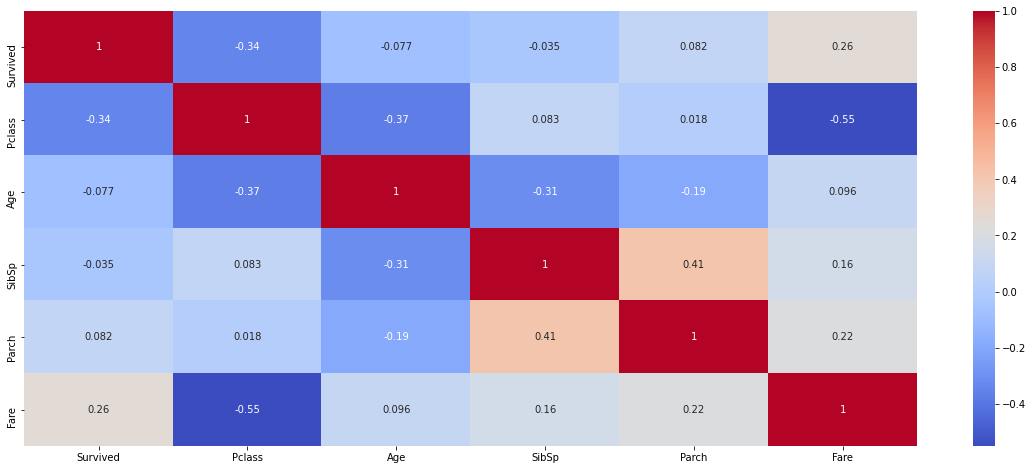

In [149]:
# Plotting the correlation heatmap
plt.figure(figsize = (20,8))
sns.heatmap(train_df.corr(), annot = True, cmap = 'coolwarm')

In [150]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [151]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [152]:
nulls = train_df.isnull().sum()
nulls

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [153]:
train_df['Cabin'].nunique()

147

In [154]:
train_df.drop(columns = 'Cabin', inplace = True)

In [155]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [156]:
train_df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

In [157]:
train_df.drop(columns = 'Ticket', inplace = True)

In [158]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [159]:
print(train_df.shape)
train_df.dropna(axis=0, subset=['Embarked'], inplace = True)

(891, 8)


In [160]:
train_df.shape

(889, 8)

In [161]:
nulls = train_df.isnull().sum()
nulls

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [162]:
# Filling age missing data with mean
mean_value = train_df['Age'].mean()
train_df['Age'].fillna(mean_value, inplace = True)

In [163]:
# Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

In [164]:
encoder = LabelEncoder()
train_df['Embarked'] = encoder.fit_transform(train_df['Embarked'])

In [165]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,2
1,1,1,female,38.000000,1,0,71.2833,0
2,1,3,female,26.000000,0,0,7.9250,2
3,1,1,female,35.000000,1,0,53.1000,2
4,0,3,male,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,2
887,1,1,female,19.000000,0,0,30.0000,2
888,0,3,female,29.642093,1,2,23.4500,2
889,1,1,male,26.000000,0,0,30.0000,0


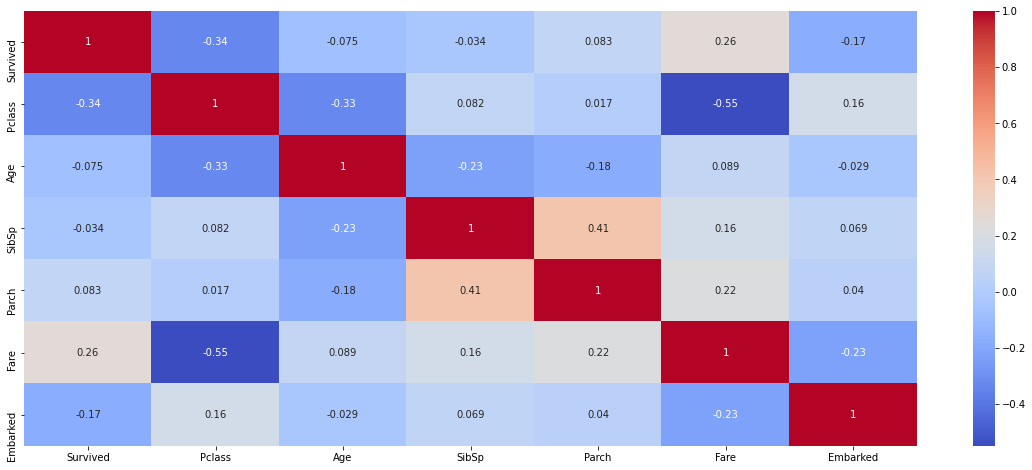

In [166]:
# Plotting the correlation heatmap
plt.figure(figsize = (20,8))
sns.heatmap(train_df.corr(), annot = True, cmap = 'coolwarm')

In [167]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,2


In [168]:
encoder = LabelEncoder()
train_df['Sex'] = encoder.fit_transform(train_df['Sex'])

In [169]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [170]:
X_train = train_df.iloc[:,1:]
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.642093,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [171]:
Y_train = train_df['Survived']
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

Creating the Model

In [172]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [173]:
# Cleaning the test dataset
test_df.drop(columns = ['Ticket','PassengerId','Name','Ticket','Cabin'], inplace = True)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [174]:
print(test_df.isnull().sum())

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [175]:
mean_value = test_df['Age'].mean()
test_df['Age'].fillna(mean_value, inplace = True)

mean_value = test_df['Fare'].mean()
test_df['Fare'].fillna(mean_value, inplace = True)

In [176]:
encoder = LabelEncoder()
test_df['Sex'] = encoder.fit_transform(test_df['Sex'])

In [177]:
encoder = LabelEncoder()
test_df['Embarked'] = encoder.fit_transform(test_df['Embarked'])

In [178]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [179]:
# Making Predictions
Y_pred = classifier.predict_proba(test_df)
Y_pred = pd.DataFrame(Y_pred)

In [180]:
Y_pred.head()

,0,1
0,0.95,0.05
1,0.76,0.24
2,0.66,0.34
3,0.33,0.67
4,0.54,0.46


In [181]:
Y_pred = Y_pred.iloc[:,1]

In [183]:
output = pd.DataFrame({'PassengerId':test_df1.PassengerId, 'Chances of Survival': Y_pred})
output

,PassengerId,Chances of Survival
0,892,0.05
1,893,0.24
2,894,0.34
3,895,0.67
4,896,0.46
...,...,...
413,1305,0.01
414,1306,1.00
415,1307,0.00
416,1308,0.01
